### 1. 导入需要的库


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer#填补空值
from sklearn.ensemble import RandomForestRegressor


### 2. 以波士顿数据集为例，导入完整的数据集并探索


In [2]:
dataset = load_boston()
dataset.data.shape
#总共506*13=6578个数据


(506, 13)

### 标签是连续性变量！！！！！所以标签是连续变量---要做的就是回归！！！

In [3]:
dataset.target#标签是连续性变量！！！！！所以标签是连续变量---要做的就是回归！！！

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [10]:
X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]
n_samples#样本的数量

506

In [12]:
n_features#标签的数量


13

### 3. 为完整数据集放入缺失值


In [5]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
 
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor：向下取整，返回.0格式的浮点数
n_missing_samples

3289

In [7]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
#以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
 
missing_features = rng.randint(0,n_features,n_missing_samples)
#randint(下限，上限，n):上下限之间取出n个整数。
missing_samples = rng.randint(0,n_samples,n_missing_samples)


X_missing = X_full.copy()
y_missing = y_full.copy()
 
X_missing[missing_samples,missing_features] = np.nan
 
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如
#pandas来得好用
X_missing.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,0.538,6.575,NaN,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,0.0,NaN,6.421,NaN,4.9671,2.0,NaN,17.8,396.90,NaN
2,0.02729,0.0,7.07,0.0,0.469,NaN,NaN,NaN,2.0,242.0,NaN,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,54.2,NaN,NaN,222.0,18.7,396.90,5.33


### y_missing 是标签，标签是不可以丢失的!所以不操作了！

### 4. 使用0和均值填补缺失值


In [14]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)



### 检查是否都填补完毕：

In [17]:
pd.DataFrame(X_missing_mean).isnull().sum()#只要返回0，代表无空缺。pd.DataFrame：
#为了只作为表格形式！

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [16]:
pd.DataFrame(X_missing_0).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

### 5. **********************使用随机森林回归填补！！********************

In [19]:
X_missing_reg = X_missing.copy()#先命名。
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,0.538,6.575,NaN,NaN,1.0,296.0,NaN,396.90,4.98
1,NaN,0.0,7.07,0.0,NaN,6.421,NaN,4.9671,2.0,NaN,17.8,396.90,NaN
2,0.02729,0.0,7.07,0.0,0.469,NaN,NaN,NaN,2.0,242.0,NaN,NaN,4.03
3,0.03237,NaN,NaN,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,54.2,NaN,NaN,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,NaN,0.0,NaN,0.0,0.573,NaN,NaN,NaN,1.0,NaN,21.0,391.99,NaN
502,0.04527,0.0,11.93,NaN,NaN,6.120,76.7,2.2875,NaN,273.0,21.0,NaN,9.08
503,0.06076,0.0,NaN,0.0,0.573,NaN,91.0,NaN,NaN,273.0,21.0,NaN,5.64
504,0.10959,0.0,NaN,NaN,0.573,6.794,89.3,2.3889,1.0,273.0,NaN,393.45,6.48


In [21]:
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
#找出数据集中，缺失值从小到大排列的特征们的顺序。（本质是找索引）
'''X_missing_reg.isnull():是否是空缺？转换成TorF
.sum(axis=0)：按列求和；
 np.argsort：有索引的排列,注意这里是排列的索引！（np.sort：这样不会有索引!）
 .values：将排列的索引中的值提取！'''
sortindex

array([ 2,  7,  8,  6,  0,  5, 11,  4,  9, 10, 12,  3,  1], dtype=int64)

In [22]:
for i in sortindex:
    
    #构建我们的新特征矩阵（没有被选中去填充的特征+原始的标签）和新标签（选中去填充的特征）
    df = X_missing_reg#避免一次操作就全部填0，无空缺。
    fillc = df.iloc[:,i]
    '''没有被选中去填充的特征df.iloc[:,df.columns != i]+原始的标签pd.DataFrame(y_full)
     pd.concat(axis=1):将这两个矩阵左右连接，axis=0：上下连接'''
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]#被选中的要去填充的特征值（现在是标签）中非空值
    Ytest = fillc[fillc.isnull()]#被选中的要去填充的特征值（现在是标签）中空值
    #以上的Y的作用就是找到索引，方便下面的X使用。
    Xtrain = df_0[Ytrain.index,:]#在新特征矩阵上，被选出要填充的特征的非空值所对应的行的其他列！
    Xtest = df_0[Ytest.index,:]#在新特征矩阵上，被选出要填充的特征的空值所对应的行的其他列！
    
    #用随机森林回归来填补缺失
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)#导入训练集去训练
    Ypredict = rfc.predict(Xtest)
    #用predict接口将Xtest导入，得到我们的预测结果（回归结果），就是我们要用来填补空值的这些值
    
    
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict



In [24]:
 #检查是否有缺失值！！！
    X_missing_reg.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

### 6. 对填补好的数据进行建模


In [26]:
from sklearn.model_selection import cross_val_score
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]
 
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)#实例化
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', 
cv=5).mean()
    mse.append(scores * -1)
    #因为scoring='neg_mean_squared_error'得到的是负均方误差，所以变成正值。


In [27]:
#查案mse,越小越好！
[*zip(["x_full","x_missing_mean","x_missing_0","x_missing_reg"],mse)]

[('x_full', 21.571667100368845),
 ('x_missing_mean', 52.568056917394664),
 ('x_missing_0', 44.611395707183064),
 ('x_missing_reg', 17.397535889303047)]

In [29]:
mse

[21.571667100368845,
 52.568056917394664,
 44.611395707183064,
 17.397535889303047]

### 7. 用所得结果画出条形图


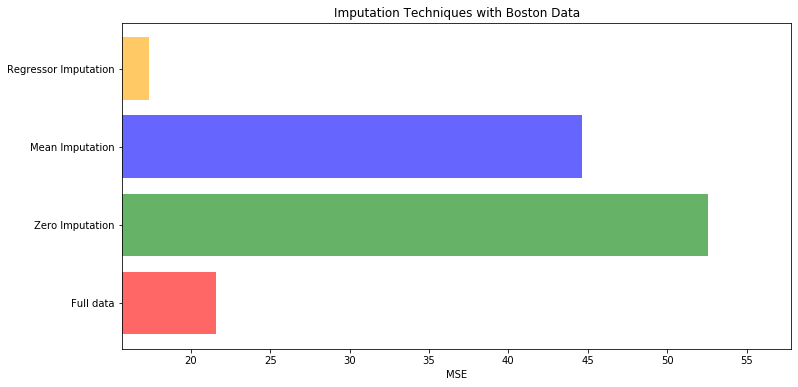

In [28]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
 
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)#添加子图。
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
    #barh：画条形图横过来的。 alpha=0.6:条的粗细
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)#设置mse（x坐标）的范围。
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()